In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


# Remove warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the bike sharing dataset

# Update path to the dataset loan.csv
PATH_TO_DATASET = 'Provide path to day.csv'

df = pd.read_csv(PATH_TO_DATASET)

In [ ]:
# he dataset has a dimensionality of 730 rows and 16 columns

df.shape

(730, 16)

In [ ]:
# List of random samples from the dataset

df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
280,281,08-10-2018,4,0,10,0,6,0,1,21.388347,25.66210,70.1250,3.042081,2235,3174,5409
184,185,04-07-2018,3,0,7,1,1,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
158,159,08-06-2018,2,0,6,0,3,1,1,31.809153,36.36395,62.2083,9.166739,676,3725,4401
67,68,09-03-2018,1,0,3,0,3,1,2,12.129153,14.33040,77.5417,14.750050,191,1700,1891
109,110,20-04-2018,2,0,4,0,3,1,1,24.395000,28.21960,61.4167,16.208975,613,3331,3944


# Data Quality Checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# Check for unique values per column

for i in range(df.shape[1]):
  print(df.columns[i], df[df.columns[i]].nunique())

instant 730
dteday 730
season 4
yr 2
mnth 12
holiday 2
weekday 7
workingday 2
weathersit 3
temp 498
atemp 689
hum 594
windspeed 649
casual 605
registered 678
cnt 695


In [ ]:
# Check for missing values

df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Check for duplicate rows and drop them

duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates dropped. Remaining rows: {df.shape[0]}")

Number of duplicate rows: 0


In [ ]:
# Convert categorical variables to category type when dealing with categorical data

categorical_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for var in categorical_vars:
    df[var] = df[var].astype('category')

print(df.head())
print(df.info())

   instant      dteday season yr mnth holiday weekday workingday weathersit  \
0        1  01-01-2018      1  0    1       0       6          0          2   
1        2  02-01-2018      1  0    1       0       0          0          2   
2        3  03-01-2018      1  0    1       0       1          1          1   
3        4  04-01-2018      1  0    1       0       2          1          1   
4        5  05-01-2018      1  0    1       0       3          1          1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 colu

In [ ]:
# Values stored per column

for i in range(df.shape[1]):
  print("-" * 80)
  print(df.columns[i], df[df.columns[i]].value_counts())

--------------------------------------------------------------------------------
instant instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64
--------------------------------------------------------------------------------
dteday dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64
--------------------------------------------------------------------------------
season season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
--------------------------------------------------------------------------------
yr yr
0    365
1    365
Name: count, dtype: int64
--------------------------------------------------------------------------------
mnth mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6   

## Discarding irrelevant columns:

* instance: Record index. This is an arbitrary identifier and does not provide any useful information for predicting bike demand.
* dteday: There are separate columns for year (yr), month (mnth). Keeping dteday would introduce *redundancy*.
* casual: Count of casual users. This is part of the target variable and should not be used as a predictor.
* registered: Count of registered users. This is part of the target variable and should not be used as a predictor.


In [ ]:
# Discard irrelevant variables

df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [ ]:
# Separate categorical and continuous variables

categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
continuous_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

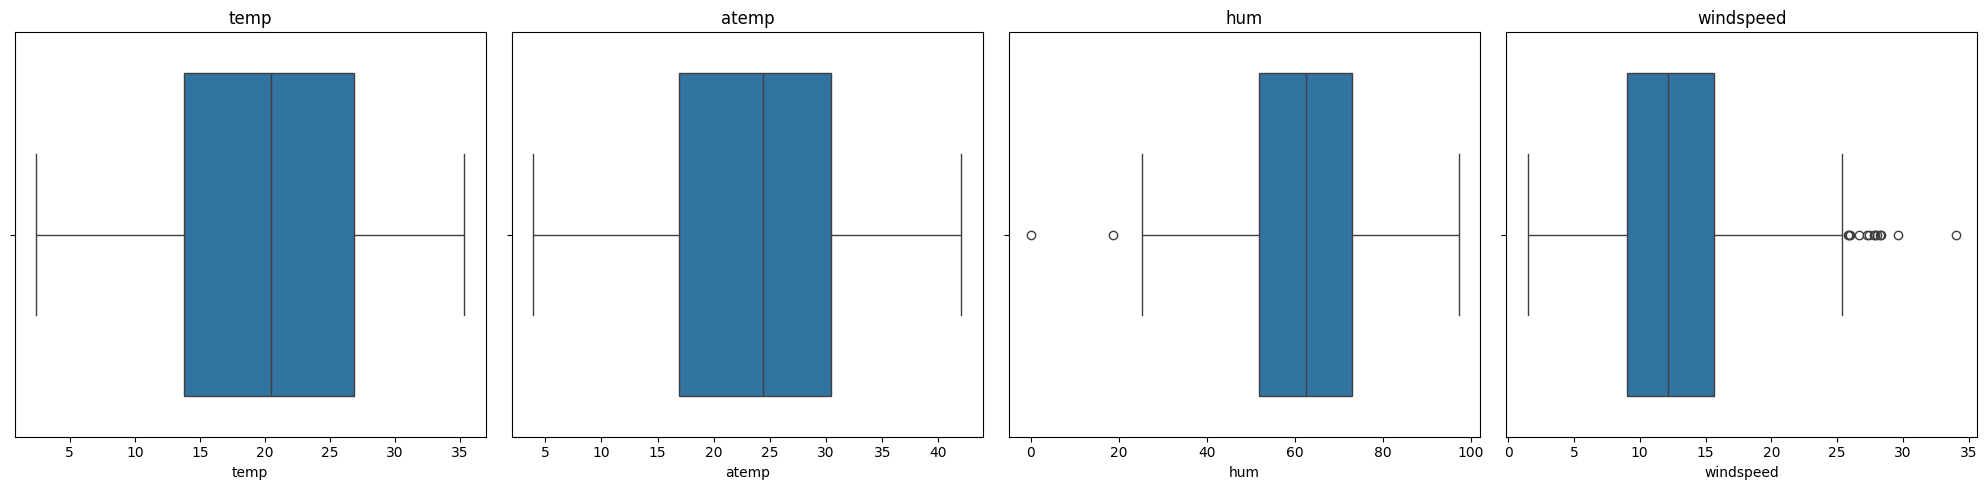

In [ ]:
# Looking for outliers among continuous columns

# Get the list of continuous columns by excluding categorical columns
continuous_columns = [col for col in df.columns if col not in categorical_columns + ['cnt']]
columns_per_row = 4

# Determine the number of rows needed
num_columns = len(continuous_columns)
num_rows = (num_columns + columns_per_row - 1) // columns_per_row

# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(20, num_rows * 5))
axes = axes.flatten()
for i in range(num_columns):
    sns.boxplot(x=df[continuous_columns[i]], ax=axes[i])
    axes[i].set_title(continuous_columns[i])

# Remove any empty subplots
for i in range(num_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Key observations from box plot:

- temp: The median for temperature values are between 15 and 25 degrees.
The median temperature is around 20 degrees with no outliers noticed in the temperature data.

- atemp: The median atemp is similar to actual temparature between ranges 15 to 30 degrees with no significant outliers and the distribution appears normal.

- hum: The humidity ranges from approximately 55 to 75 with the median humidity around 65. There is left skewness indicating exceptionally low humidity.

- windspeed: The IQR here ranges from 10 to 15 units with a median of around 12.5 units. There is right skewness indicating unusually high windspeed.


In [ ]:
# Calculate quartiles and IQR and identify outlier rows for Humidity column

Q1 = df['hum'].quantile(0.25)
Q3 = df['hum'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower bound for outliers
lower_bound = Q1 - 1.5 * IQR

# Filter rows with 'hum' values below the lower bound
lower_outliers = df[df['hum'] < lower_bound]

print(lower_outliers)

   season yr mnth holiday weekday workingday weathersit       temp    atemp  \
49      1  0    2       0       6          0          1  16.365847  19.5702   
68      1  0    3       0       4          1          3  15.952731  19.2834   

        hum  windspeed   cnt  
49  18.7917  34.000021  1635  
68   0.0000  17.545759   623  


In [ ]:
# Calculate quartiles and IQR and identify outlier rows for windspeed column

Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Filter rows with 'windspeed' values above the upper bound
higher_outliers = df[df['windspeed'] > upper_bound]

print(higher_outliers)

    season yr mnth holiday weekday workingday weathersit       temp     atemp  \
44       1  0    2       0       1          1          1  17.015000  19.91750   
49       1  0    2       0       6          0          1  16.365847  19.57020   
93       2  0    4       0       1          1          1  23.506653  27.14645   
94       2  0    4       0       2          1          2  16.980847  19.91750   
292      4  0   10       0       4          1          1  19.509153  23.32625   
382      1  1    1       0       3          1          1  12.436653  13.76270   
407      1  1    2       0       0          0          1   5.227500   5.08290   
420      1  1    2       0       6          0          1  11.924153  12.78375   
431      1  1    3       0       4          1          1  21.627500  26.23020   
432      1  1    3       0       5          1          2  16.844153  19.85415   
449      2  1    3       0       1          1          1  18.279153  21.93750   
665      4  1   10       0  

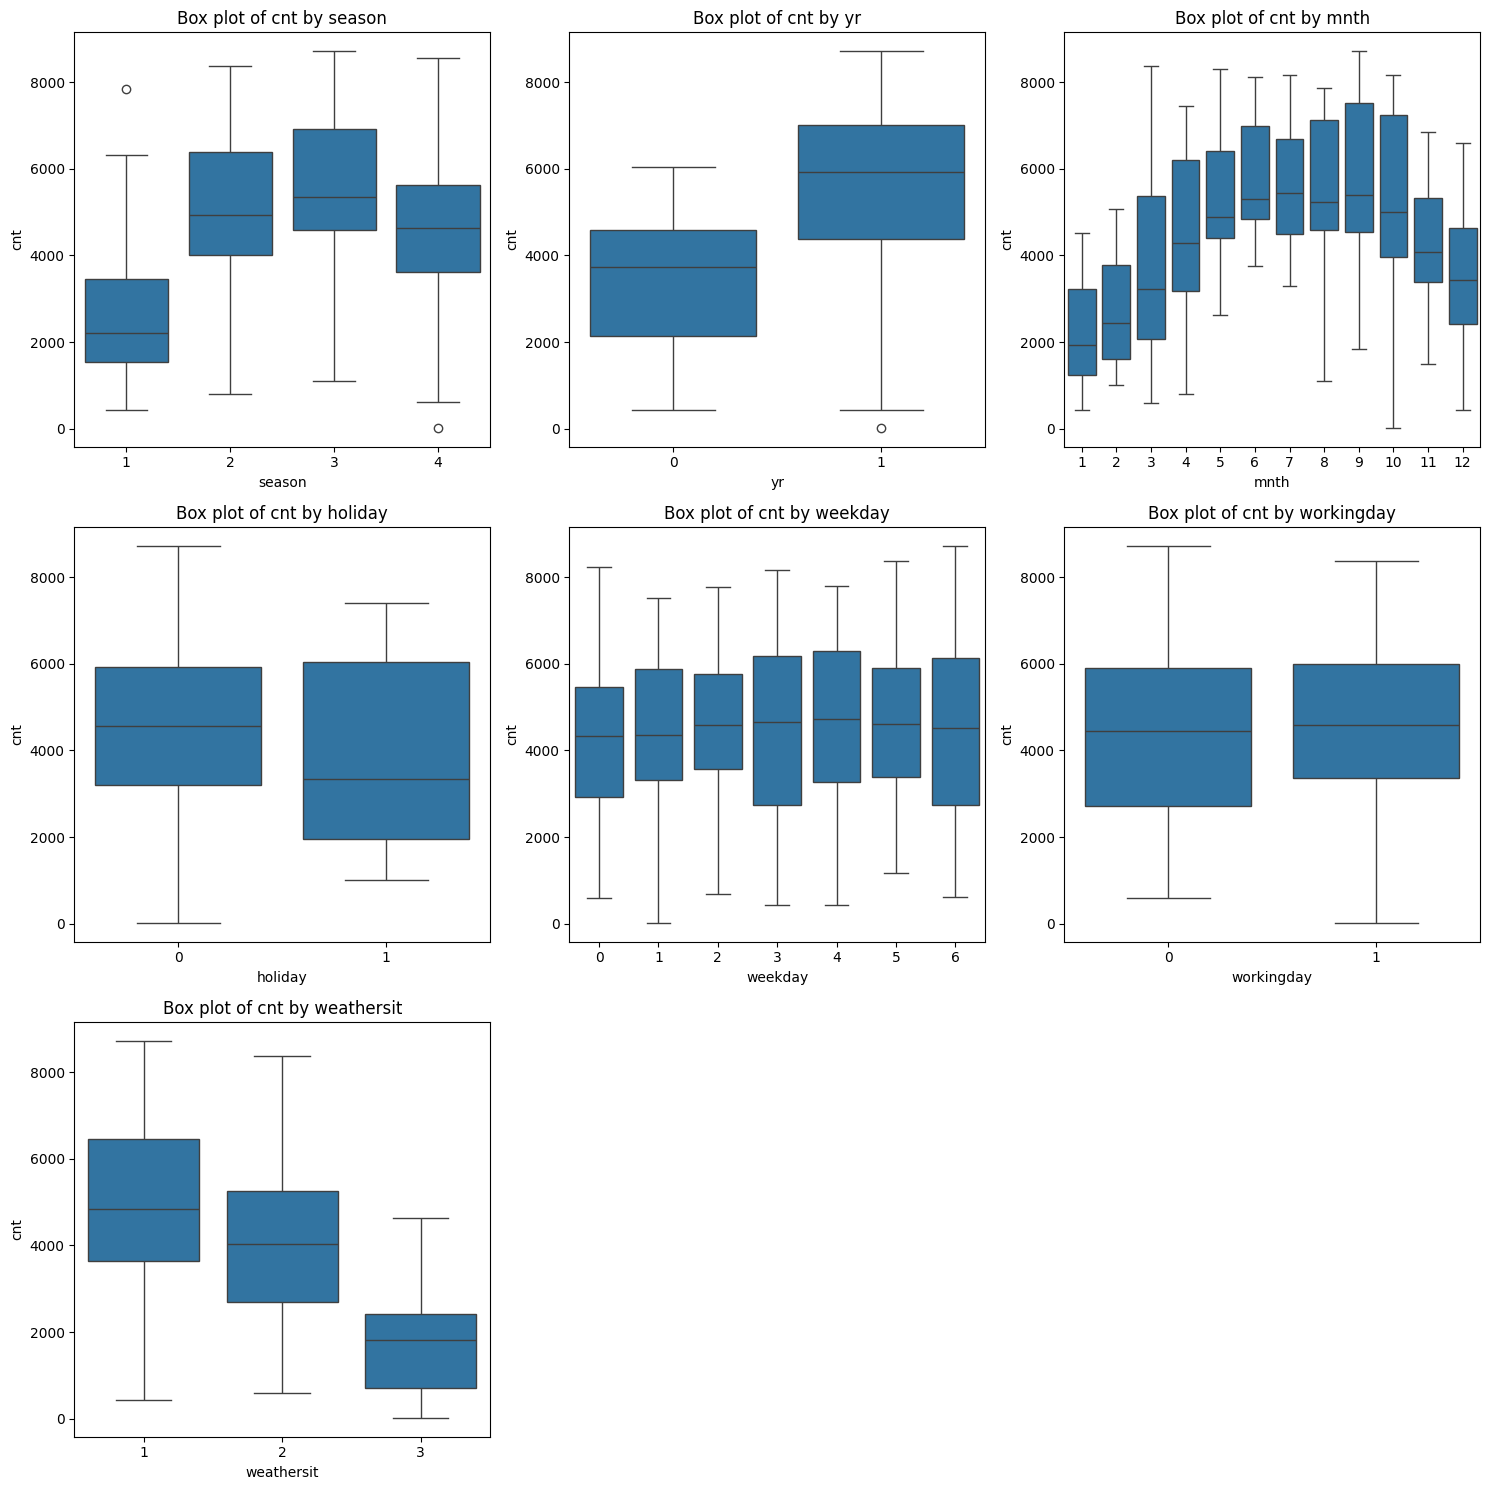

In [ ]:
# Specify the target variable
target_var = 'cnt'

# Number of rows and columns for the grid
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plotting box plots
for i, column in enumerate(categorical_columns):
    sns.boxplot(x=column, y=target_var, data=df, ax=axes[i])
    axes[i].set_title(f'Box plot of {target_var} by {column}')

for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Key Observations from box plot:

**cnt by season:**

* Rentals are highest in season 3 (Fall), with a median around 6000.

* Rentals are lowest in season 1 (Winter), with a median just above 2000.

* Season 2 (Summer) shows a relatively high number of rentals, with a median around 5000.

* Season 4 (Winter) has moderate rentals, with a median slightly below 5000.

**cnt by year (yr):**

There is a clear increase in the median number of rentals from the first year (2018) to the second year (2019), approximately 6000. This indicates a upward trend in rentals between the years.

**cnt by month (yr):**

* Rentals peak in the middle of the year, particularly around months 6 to 8 (June to August).

* The lowest rental counts are seen in the winter months, particularly in month 1 (January) and towards year end.

* The rentals are higher in the summer months compared to the winter months.

**cnt by holiday:**

* Rentals are slightly lower on holidays compared to non-holidays.

**cnt by weekday:**

* Rentals are relatively consistent across weekdays, with slight variations.

*The median rentals range from around 4000 to 5000 across different weekdays.

**cnt by working day:**

* Rentals are slightly higher on working days compared to non-working days.

**cnt by working weather situation (weathersit):**

* There is a noticeable decrease in rentals as weather conditions worsen.


Overall, the box plots reveal that bike rentals are influenced by season, year, month, holiday, weekday, working day, and weather conditions, with notable patterns in each category.

# Dummy Variable Creation (One Hot Encoding)

In [ ]:
# Convert categorical variables to dummy variables

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)

print(df.shape)
print(df.head())

(730, 30)
        temp     atemp      hum  windspeed   cnt  season_2  season_3  \
0  14.110847  18.18125  80.5833  10.749882   985         0         0   
1  14.902598  17.68695  69.6087  16.652113   801         0         0   
2   8.050924   9.47025  43.7273  16.636703  1349         0         0   
3   8.200000  10.60610  59.0435  10.739832  1562         0         0   
4   9.305237  11.46350  43.6957  12.522300  1600         0         0   

   season_4  yr_1  mnth_2  ...  holiday_1  weekday_1  weekday_2  weekday_3  \
0         0     0       0  ...          0          0          0          0   
1         0     0       0  ...          0          0          0          0   
2         0     0       0  ...          0          1          0          0   
3         0     0       0  ...          0          0          1          0   
4         0     0       0  ...          0          0          0          1   

   weekday_4  weekday_5  weekday_6  workingday_1  weathersit_2  weathersit_3  
0        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   atemp         730 non-null    float64
 2   hum           730 non-null    float64
 3   windspeed     730 non-null    float64
 4   cnt           730 non-null    int64  
 5   season_2      730 non-null    int64  
 6   season_3      730 non-null    int64  
 7   season_4      730 non-null    int64  
 8   yr_1          730 non-null    int64  
 9   mnth_2        730 non-null    int64  
 10  mnth_3        730 non-null    int64  
 11  mnth_4        730 non-null    int64  
 12  mnth_5        730 non-null    int64  
 13  mnth_6        730 non-null    int64  
 14  mnth_7        730 non-null    int64  
 15  mnth_8        730 non-null    int64  
 16  mnth_9        730 non-null    int64  
 17  mnth_10       730 non-null    int64  
 18  mnth_11       730 non-null    

In [ ]:
# Compute the correlation matrix before train/test/split

corr_matrix = df.corr()

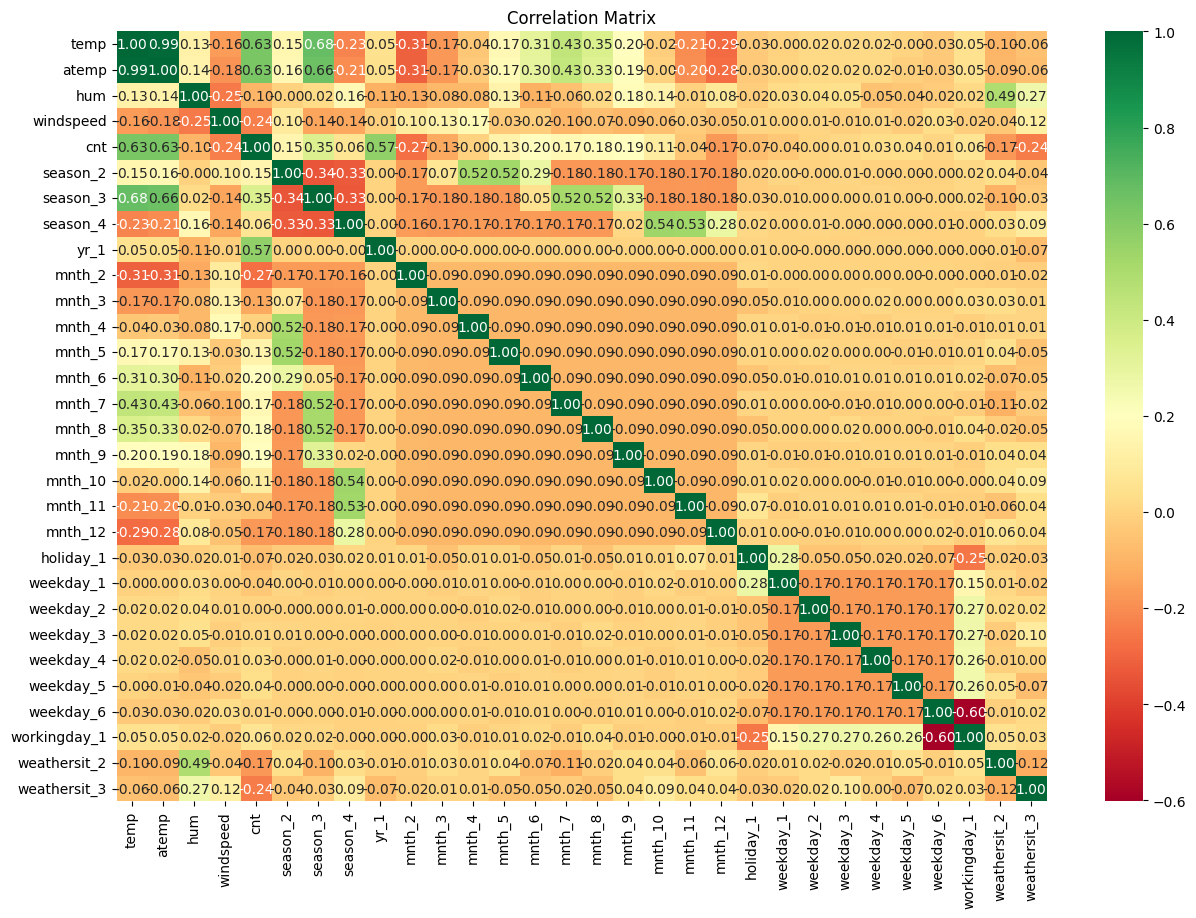

In [ ]:
# Heatmap visualization for corrrelation matrix
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### Key Observations from Heatmap:

* There is a high positive correlation between temp and atemp (almost 1), suggesting these variables are closely related.

* temp and cnt: There is a moderate positive correlation between temp (temperature) and cnt (count, possibly referring to bike rentals or similar) with a coefficient around 0.63. This suggests that higher temperatures might be associated with increased counts.


* The different season variables show some correlations with cnt. For example, season_3 (possibly autumn) has a positive correlation with cnt (around 0.22), while season_4 (possibly winter) has a negative correlation with cnt (around -0.33). This indicates seasonal variations in the count, with more activity in certain seasons and less in others.

* humidity (hum) and cnt: The correlation between humidity and count is slightly negative (-0.10), suggesting that higher humidity levels may be associated with a slight decrease in the activity measured by cnt.
weekday Variables:

* The weekday variables, which likely indicate the day of the week, generally have weak correlations with cnt, suggesting that the day of the week might not be a strong predictor of the count.
holiday and workingday Variables:

* holiday_1 (likely indicating whether a day is a holiday) and workingday (indicating whether it is a working day) show weak correlations with cnt. This might suggest that the count variable is not strongly influenced by whether it is a holiday or a working day, or the influence is more complex.
weathersit Variables:

* There are moderate negative correlations between weathersit_3 and cnt (around -0.31), suggesting that certain weather conditions (potentially adverse ones) might negatively impact the count.

* Some variables, like holiday_1, weekday_1, and weather_3, show lower correlations with other variables.

# Train, Test & Split

In [ ]:
# Split the data into training and test sets

# Drop unnecessary columns
X = df.drop(columns=['cnt'])
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


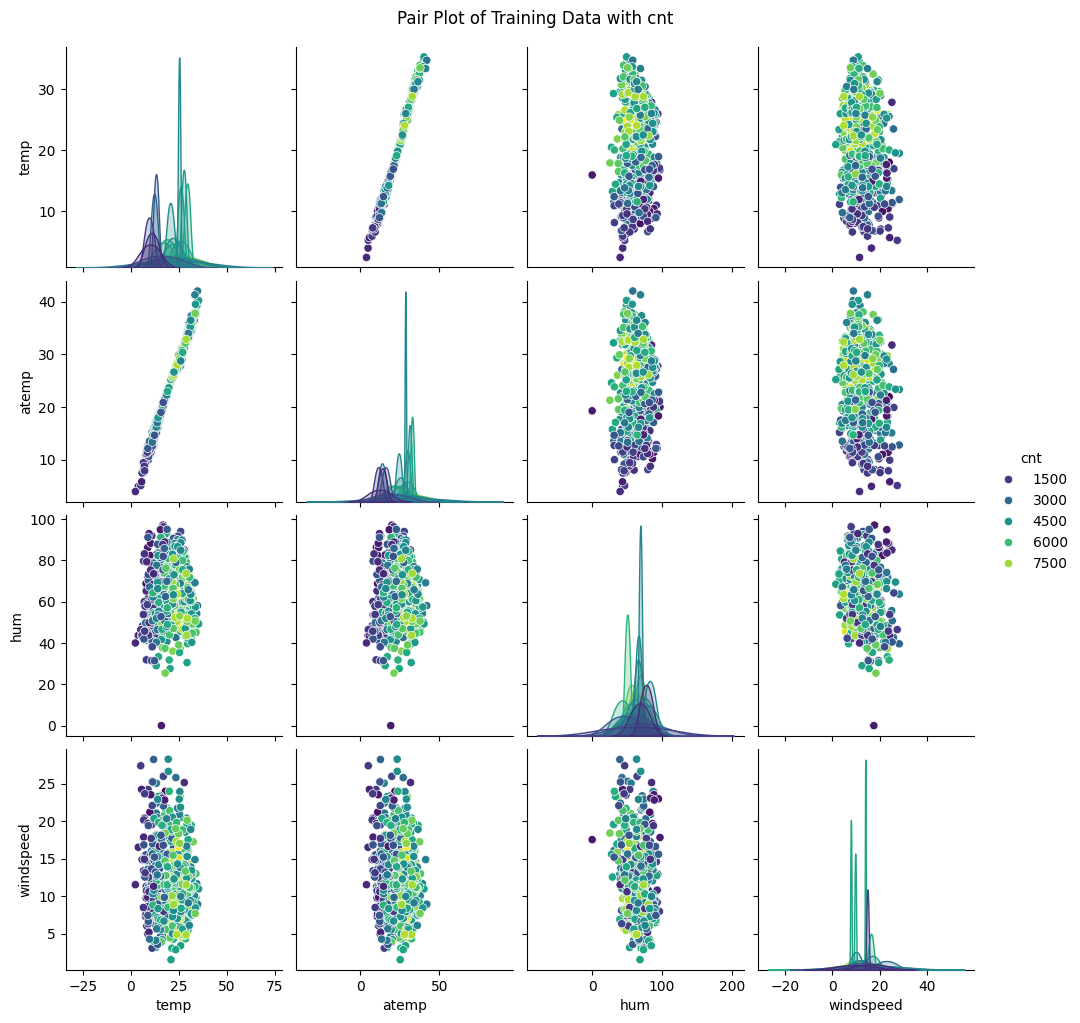

In [ ]:
# Combine X_train and y_train into a single DataFrame for pair plot
train_data = pd.concat([X_train, y_train], axis=1)

# Generate the pair plot
sns.pairplot(train_data, vars=continuous_columns, hue='cnt', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Training Data with cnt', y=1.02)
plt.show()

### Key Observations from Pairplot:

* temp vs. atemp: There is a strong linear relationship between temp and atemp, shown by a tight clustering of points along a line. This indicates that these variables are highly correlated.

* temp vs. cnt: There is a positive trend where higher temperatures tend to have higher cnt values. This indicates favorable weather increases outdoor activity.

* atemp vs. cnt: Similar to temp, atemp shows a positive correlation with cnt.

* hum vs. cnt: Notice a weak negative correlation, where higher humidity levels are associated with lower cnt values.

# Scaling

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Converting the numpy array to pandas dataframe

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Feature Selection

In [ ]:
# Perform Recursive Feature Elimination (RFE) with the specified linear regression model
# and the desired number of features to select

model=LinearRegression()

num_features_to_select = 15
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)


In [ ]:
# Fit RFE on the scaled training data

rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False,  True,  True,
        True,  True])

In [ ]:
# Selected features for RFE

selected_features=X_train.columns[rfe.support_]
selected_features

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [ ]:
# Un-selected features for RFE

X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_10', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [ ]:
# Training set of selected RFE features
X_train_rfe = X_train[selected_features]

# Test set of selected RFE features
X_test_rfe = X_test[selected_features]

# Modelling

## Trial 1

In [ ]:
# Add a constant (intercept) column to the training dataset for the regression model
X_train_trial1 = sm.add_constant(X_train_rfe)

# Add a constant (intercept) column to the test dataset to match the training dataset's format
X_test_trial1 = sm.add_constant(X_test_rfe)


In [ ]:
# Create an OLS (Ordinary Least Squares) regression model using the training data
model_trial1 = sm.OLS(np.array(y_train), X_train_trial1)

# Fit the OLS model to the training data
res_trial1 = model_trial1.fit()

# Print the summary of the regression results, including coefficients, R-squared, p-values, etc.
print(res_trial1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     193.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          6.69e-212
Time:                        06:02:55   Log-Likelihood:                -4725.0
No. Observations:                 584   AIC:                             9482.
Df Residuals:                     568   BIC:                             9552.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4546.3613     33.138    137.193   

In [ ]:
# Import the variance_inflation_factor function from statsmodels to calculate VIF

# Create a DataFrame to store the VIF results
vif_data = pd.DataFrame()

# Add a column for feature names
vif_data["Feature"] = X_train_trial1.columns

# Calculate the VIF for each feature and store it in the DataFrame
vif_data["VIF"] = [variance_inflation_factor(X_train_trial1.values, i)
                   for i in range(len(X_train_trial1.columns))]

# Sort the DataFrame by VIF values in descending order to identify features with high multicollinearity
vif_data.sort_values(by="VIF", ascending=False)


,Feature,VIF
1,temp,186.541109
2,atemp,181.811925
6,season_3,5.708702
7,season_4,3.068988
5,season_2,2.952389
3,hum,1.953668
10,mnth_11,1.723542
14,weathersit_2,1.608387
13,workingday_1,1.563811
12,weekday_6,1.541297


### Key Observations - Trial 1

From the below metrics, we can infer that the model is effective with multiple independent variables

R-squared: 0.837 <br>
Adjusted R-squared: 0.832 <br>
F-statistic: 193.8 <br>

There are two variables with high p-value >= 0.05 suggesting they are not statistically significant in this model and one of them can be dropped. Same is noticed in their VIF scores indicating these two variables are highly correlated to each other.

High p-value:
  * temp: 0.329
  * atemp: 0.356[link text](https://)






## Trial 2

#### Based on the trial 1 observation i.e High p-value >= 0.05 and VIF score > 5, dropping column `atemp`.

In [ ]:
X_train_rfe2 = X_train_rfe.drop(["atemp"], axis = 1)
X_test_rfe2 = X_test_rfe.drop(["atemp"], axis = 1)

In [ ]:
X_train_rfe2.columns

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [ ]:
X_train_trial2=sm.add_constant(X_train_rfe2)
X_test_trial2=sm.add_constant(X_test_rfe)

In [ ]:
X_train_trial2.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [ ]:
model_trial2=sm.OLS(np.array(y_train),X_train_trial2)
res_trial2=model_trial2.fit()
print(res_trial2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          6.97e-213
Time:                        06:02:55   Log-Likelihood:                -4725.4
No. Observations:                 584   AIC:                             9481.
Df Residuals:                     569   BIC:                             9546.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4546.3613     33.134    137.211   

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_trial2.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_trial2.values,i)
                 for i in range(len(X_train_trial2.columns))]
vif_data.sort_values(by = "VIF", ascending = False)

,Feature,VIF
5,season_3,5.678557
1,temp,4.027993
6,season_4,3.038330
4,season_2,2.941497
2,hum,1.918466
9,mnth_11,1.723383
13,weathersit_2,1.591268
12,workingday_1,1.558981
11,weekday_6,1.540236
14,weathersit_3,1.326462


### Key Observations - Trial 2

R-squared: 0.836 <br>
Adjusted R-squared: 0.832 <br>
F-statistic: 207.6 <br>

Before Removing atemp:<br>
temp: 442.2566 (p-value = 0.329, not significant)<br>
atemp: 413.1337 (p-value = 0.356, not significant)<br>
After Removing atemp:
temp: 856.1862 (significant)

On removing atemp, the variable temp became significant which indicates temp is a better predictor when included.

The only variable with a VIF slightly above 5 is season_3.

## Trial 3

In [ ]:
X_train_rfe3 = X_train_rfe2.drop(["season_3"], axis = 1)
X_test_rfe3 = X_test_rfe2.drop(["season_3"], axis = 1)

In [ ]:
X_train_trial3=sm.add_constant(X_train_rfe3)
X_test_trial3=sm.add_constant(X_test_rfe3)

In [ ]:
X_train_trial3.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_2', 'season_4', 'yr_1',
       'mnth_9', 'mnth_11', 'mnth_12', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [ ]:
model_trial3=sm.OLS(np.array(y_train),X_train_trial3)
res_trial3=model_trial3.fit()
print(res_trial3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     214.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.08e-209
Time:                        06:02:55   Log-Likelihood:                -4735.8
No. Observations:                 584   AIC:                             9500.
Df Residuals:                     570   BIC:                             9561.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4546.3613     33.697    134.918   

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_trial3.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_trial3.values,i)
                 for i in range(len(X_train_trial3.columns))]
vif_data.sort_values(by = "VIF", ascending = False)

,Feature,VIF
2,hum,1.903605
5,season_4,1.803727
8,mnth_11,1.620605
12,weathersit_2,1.588093
11,workingday_1,1.558956
10,weekday_6,1.538637
1,temp,1.327739
13,weathersit_3,1.318914
9,mnth_12,1.297409
4,season_2,1.227906


### Key Observations - Trial 3

* All the predictors in the model (after removing season_3) are statistically significant (p-value < 0.05).

* The R-squared value of 0.830 is still a strong fit.`

## Model Interpretation

#### 1. Model Fit

- **R-squared (0.830)**: This indicates that approximately 83.0% of the variability in the dependent variable \(y\) is explained by the model. This is a strong fit, suggesting that the model captures most of the variance in the data.
- **Adjusted R-squared (0.827)**: This is the adjusted R-squared value. The value is close to R-squared, indicating that the model’s complexity is appropriate and it is not overfitting.
- **F-statistic (214.6)**: The high F-statistic with a very low p-value suggests that the model as a whole is statistically significant, meaning that at least one of the predictors has a significant relationship with the dependent variable.

#### 2. Coefficients and Significance

- **temp**: 1102.9374
  - **Interpretation**: For each unit increase in `temp`, \(y\) increases by 1102.9374 units, holding other variables constant.
  - **Significance**: Highly significant (p-value < 0.001).

- **hum**: -213.6207
  - **Interpretation**: For each unit increase in `hum`, \(y\) decreases by 213.6207 units, holding other variables constant.
  - **Significance**: Highly significant (p-value < 0.001).

- **windspeed**: -223.8142
  - **Interpretation**: For each unit increase in `windspeed`, \(y\) decreases by 223.8142 units, holding other variables constant.
  - **Significance**: Highly significant (p-value < 0.001).

- **season_2**: 344.1223
  - **Interpretation**: Being in `season_2` increases \(y\) by 344.1223 units compared to the baseline season, holding other variables constant.
  - **Significance**: Highly significant (p-value < 0.001).

- **season_4**: 642.2736
  - **Interpretation**: Being in `season_4` increases \(y\) by 642.2736 units compared to the baseline season, holding other variables constant.
  - **Significance**: Highly significant (p-value < 0.001).

- **yr_1**: 978.2739
  - **Interpretation**: Being in the year `yr_1` increases \(y\) by 978.2739 units compared to the baseline year, holding other variables constant.
  - **Significance**: Highly significant (p-value < 0.001).

- **mnth_9**: 236.0595
  - **Interpretation**: In September (`mnth_9`), \(y\) increases by 236.0595 units compared to the baseline month, holding other variables constant.
  - **Significance**: Highly significant (p-value < 0.001).

- **mnth_11**: -133.3281
  - **Interpretation**: In November (`mnth_11`), \(y\) decreases by 133.3281 units compared to the baseline month, holding other variables constant.
  - **Significance**: Significant (p-value = 0.002).

- **mnth_12**: -107.2165
  - **Interpretation**: In December (`mnth_12`), \(y\) decreases by 107.2165 units compared to the baseline month, holding other variables constant.
  - **Significance**: Significant (p-value = 0.005).

- **weekday_6**: 189.9332
  - **Interpretation**: On weekends (`weekday_6`), \(y\) increases by 189.9332 units compared to weekdays, holding other variables constant.
  - **Significance**: Highly significant (p-value < 0.001).

- **workingday_1**: 201.1698
  - **Interpretation**: On working days (`workingday_1`), \(y\) increases by 201.1698 units compared to non-working days, holding other variables constant.
  - **Significance**: Highly significant (p-value < 0.001).

- **weathersit_2**: -201.4066
  - **Interpretation**: For `weathersit_2`, \(y\) decreases by 201.4066 units compared to the baseline weather situation, holding other variables constant.
  - **Significance**: Highly significant (p-value < 0.001).

- **weathersit_3**: -358.3965
  - **Interpretation**: For `weathersit_3`, \(y\) decreases by 358.3965 units compared to the baseline weather situation, holding other variables constant.
  - **Significance**: Highly significant (p-value < 0.001).

### Overall Interpretation

The final model (Trial 3) provides a strong fit to the data with an R-squared of 0.830, and the model is generally reliable.

# Residual Analysis

In [ ]:
# Make Predictions

y_pred = res_trial3.predict(X_train_trial3)

In [ ]:
# Calculate Residuals

residuals = np.array(y_train) - y_pred

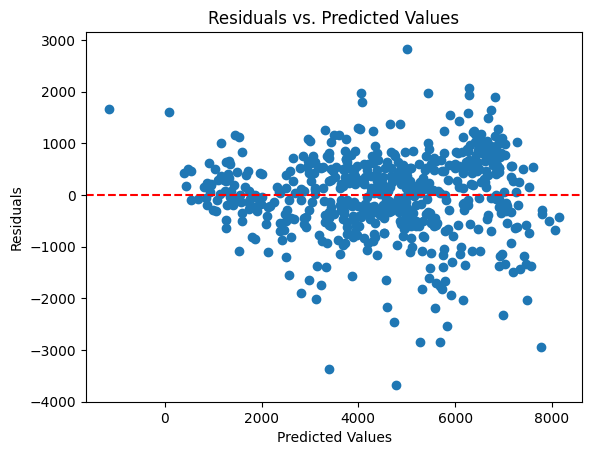

In [ ]:
# Residuals vs. Predicted Values Plot

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

The plot does not show a clear non-linear pattern. There is a spread around the red dotted line (y=0).

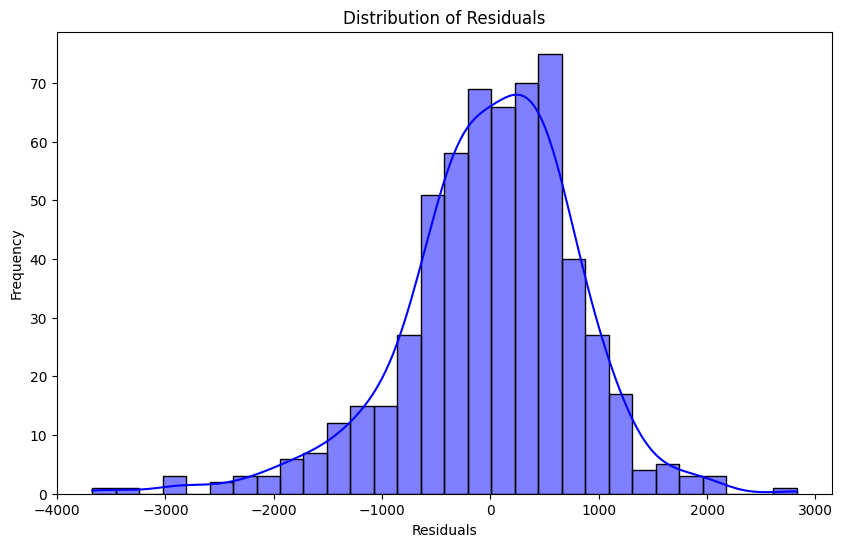

In [ ]:
# Plotting the distribution of residuals

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

From the plot we can infer that the model performs reasonably well, with residuals centered around zero and a roughly normal distribution.

# Predictions on Test Set

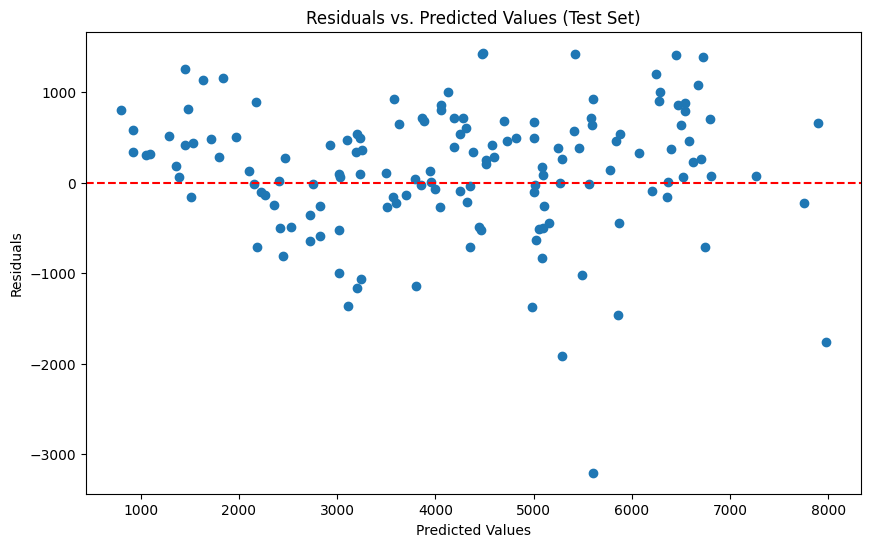

In [ ]:
# Make predictions on the test set
y_test_pred = res_trial3.predict(X_test_trial3)

# Calculate residuals for the test set
residuals_test = np.array(y_test) - y_test_pred

# Residuals vs. Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Test Set)')
plt.show()

On the test set, the residuals are centered around zero indicating the model capturing relationships well.

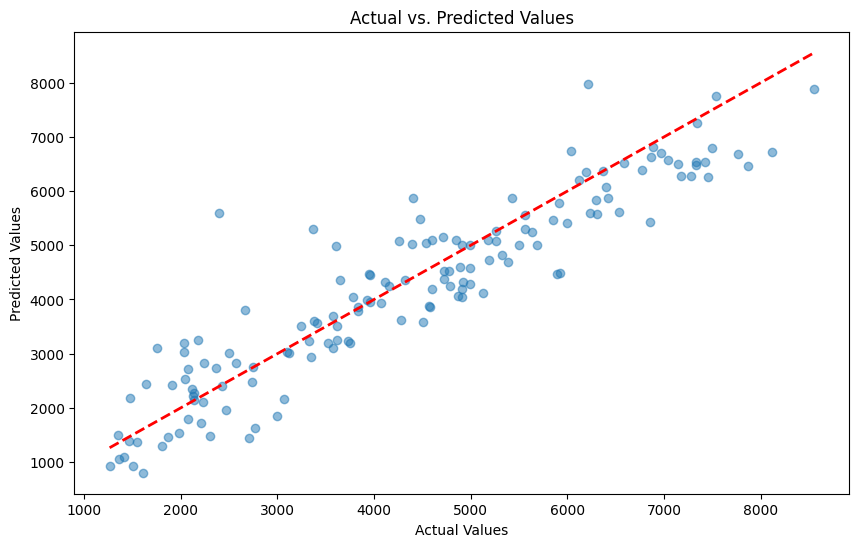

In [ ]:
# Actual vs. Predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In the scatter plot, the data points are  scattered around the red line, suggesting the model is reasonably predicting the values.

# Model Evaluation

### R-squared

In [ ]:
# Calculating R-squared

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)

print(f"R-squared Score: {r2}")

R-squared Score: 0.8488521104230038


### Ajusted R-Squared

In [ ]:
# Calculating adjusted R-Squared

# Number of observations
n = len(y_test)

# Number of predictors in the model
p = X_train.shape[1]

# Calculate Adjusted R-squared
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R-squared: {r2_adj}")

Adjusted R-squared: 0.8110651380287548


# Conclusion

- Model Fit
  - R-squared (0.848): The score of 84.9% indicates the variability in the dependent variable (y) is explained by the independent variables (X) in the model. This is a high value, suggesting the model fits the data well.

  - Adjusted R-squared (0.811): The adjusted R-squared of 81.1% indicates a strong model. This value is close to the R-squared value indicating that the added predictors are relevant and contribute to the variance.

- Model Complexity
  - As the Adjusted R-squared is close to the R-squared suggests that the model is not overfitting.

- Residuals:
  - The histogram indicates the residuals are normally distributed, mostly centered around zero resembling a bell-shaped curve with the KDE line following the shape closely.

- Prediction Quality
  - Both the above values suggest that the model has strong prediction and it can capture the underlying patterns in the data to predict the dependent variable.

  Overall, the model identified:

  - temperature and weather conditions as significant predictors of bike demand. This indicates that bike usage is highly sensitive to changes in temperature and weather, suggesting that people are more likely to use bikes in favorable weather conditions.
  - Seasonal variations significantly affect bike demand, with higher demand in certain seasons. This implies that bike usage patterns change throughout the year, peaking during warmer or more pleasant weather months.
  - Working days and holidays have a notable impact on bike demand. Noticed higher demand on working days for commuting purposes and different on holidays for leisure activities.